In [2]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [48]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,19659,None,None,88636.206156
2020-06-13,19660,None,None,81917.537244
2020-06-14,19661,None,None,75730.388949
2020-06-15,19662,None,None,70076.563022
2020-06-16,19663,None,None,65130.281746
...,...,...,...,...
2020-12-20,19850,None,None,360153.014065
2020-12-21,19851,None,None,378191.465904
2020-12-22,19852,None,None,397925.386250


In [40]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/Downloads/zoe_uk_active_cases_2020-12-24_2020-12-24-17-26.pickle


In [41]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/Downloads/zoe_uk_active_cases_2020-12-23_2020-12-23-16-10.pickle


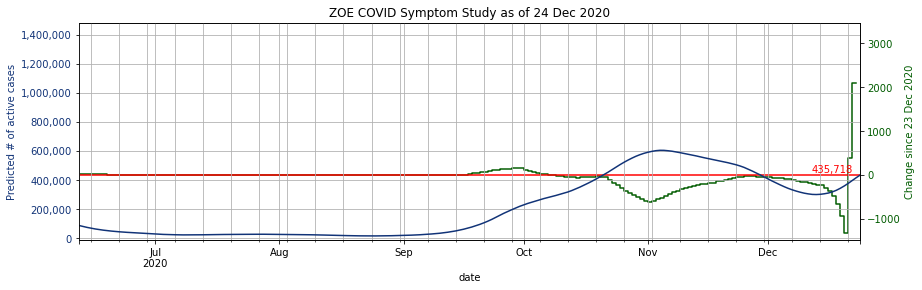

In [42]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

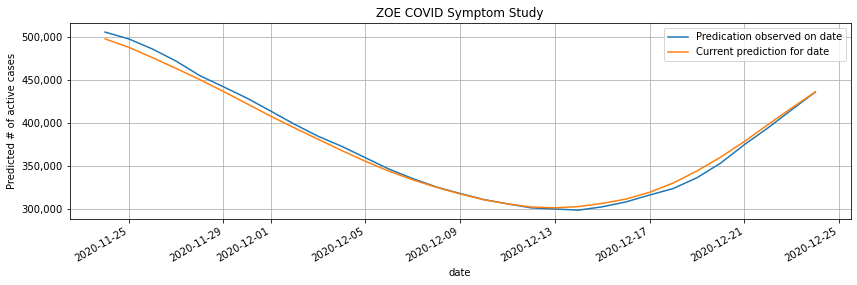

In [43]:
plot_study_evolution(curr_date, days=30)

In [ ]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [45]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/Downloads/zoe_prevalence_map_2020-12-24_2020-12-24-17-26.pickle


In [46]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
340,Neath Port Talbot,W06000012,3.817362
342,Bridgend,W06000013,3.484368
386,Newport,W06000022,3.413244
344,Cardiff,W06000015,3.065697
381,Rhondda Cynon Taf,W06000016,2.952704
384,Torfaen,W06000020,2.652148
334,Wrexham,W06000006,2.103673
350,Havering,E09000016,2.091760
339,Swansea,W06000011,1.939691
370,Redbridge,E09000026,1.925183
